# Other Custom NL Data Augmentations

In [188]:
import pandas as pd
import numpy as np
import random
random.seed(42)

train_data = pd.read_csv('~/dataset/train/train.csv')
train_data_eda = pd.read_csv('~/dataset/train/train_aug_4eda_ksh.csv')

In [6]:
train_data

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
...,...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '손병희', 'start_idx': 17, 'end_idx': 19...",per:colleagues,wikipedia
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, ...",org:top_members/employees,wikitree
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': ...",no_relation,wikipedia


In [189]:
train_data_eda

,id,sentence,subject_entity,object_entity,label,source,original,replaced
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,NaN,NaN
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,NaN,NaN
2,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,NaN,NaN
3,6,그에 따라 나폴리와 계약을 연장한 마라도나는 1989년 팀을 UEFA컵 정상으로 인...,"{'word': 'AC 밀란', 'start_idx': 64, 'end_idx': ...","{'word': '1989', 'start_idx': 25, 'end_idx': 2...",no_relation,wikipedia,NaN,NaN
4,14,"조토 디 본도네, 마사초, 피에로 델라 프란체스카, 도메니코 기를란다요, 페루지노,...","{'word': '미켈란젤로', 'start_idx': 47, 'end_idx': ...","{'word': '르네상스', 'start_idx': 96, 'end_idx': 9...",no_relation,wikipedia,NaN,NaN
...,...,...,...,...,...,...,...,...
40256,131719,의경세자 장이 갑자기 병으로 사망하고 사가로 나가게 된 수빈 한씨(내일의 인수대비)...,"{'word': '자을산군', 'start_idx': 94, 'end_idx': 9...","{'word': '인수대비', 'start_idx': 41, 'end_idx': 4...",per:parents,wikipedia,"['후일', '자주']","['내일', '자립']"
40257,132151,"1651년에 김자점의 옥사에 연루되어 모친인 귀인 조씨는 사사되고, 동생인 낙선군은...","{'word': '낙선군', 'start_idx': 42, 'end_idx': 44...","{'word': '귀인 조씨', 'start_idx': 25, 'end_idx': ...",per:parents,wikipedia,['어머니'],['모친']
40258,132200,페르난도 1세는 죽을 때 여러 놈들에게 왕국을 나누어주면서 둘째 아들 알폰소 6세에...,"{'word': '알폰소 6세', 'start_idx': 39, 'end_idx':...","{'word': '페르난도 1세', 'start_idx': 0, 'end_idx':...",per:parents,wikipedia,['자식'],['놈']
40259,132202,1714년 루이 14세가 죽고 난 뒤에는 프랑수아즈도 궁에서 물러났고 어린 루이 1...,"{'word': '루이 15세', 'start_idx': 42, 'end_idx':...","{'word': '루이 14세', 'start_idx': 6, 'end_idx': ...",per:parents,wikipedia,['대신'],['보수']


In [27]:
train_labels_dict = {'no_relation': 0, 
                     'org:top_members/employees': 1, 
                     'org:members': 2, 
                     'org:product': 3, 
                     'per:title': 4, 
                     'org:alternate_names': 5, 
                     'per:employee_of': 6, 
                     'org:place_of_headquarters': 7, 
                     'per:product': 8, 
                     'org:number_of_employees/members': 9, 
                     'per:children': 10, 
                     'per:place_of_residence': 11, 
                     'per:alternate_names': 12, 
                     'per:other_family': 13, 
                     'per:colleagues': 14, 
                     'per:origin': 15, 
                     'per:siblings': 16, 
                     'per:spouse': 17, 
                     'org:founded': 18, 
                     'org:political/religious_affiliation': 19, 
                     'org:member_of': 20, 
                     'per:parents': 21, 
                     'org:dissolved': 22, 
                     'per:schools_attended': 23, 
                     'per:date_of_death': 24, 
                     'per:date_of_birth': 25, 
                     'per:place_of_birth': 26, 
                     'per:place_of_death': 27, 
                     'org:founded_by': 28, 
                     'per:religion': 29}

label2nick = {0: 'nr',
              1: 'o:t_m/e',
              2: 'o:m',
              3: 'o:p',
              4: 'p:t',
              5: 'o:a_n',
              6: 'o:e_o',
              7: 'o:p_o_h',
              8: 'p:pr',
              9: 'o:n_o_e/m',
             10: 'p:ch',
             11: 'p:p_o_r',
             12: 'p:a_n',
             13: 'p:o_f',
             14: 'p:co',
             15: 'p:o',
             16: 'p:si',
             17: 'p:sp',
             18: 'o:f',
             19: 'o:p/r_a',
             20: 'o:m_o',
             21: 'p:pa',
             22: 'o:d',
             23: 'p:s_a',
             24: 'p:d_o_d',
             25: 'p:d_o_b',
             26: 'p:p_o_b',
             27: 'p:p_o_d',
             28: 'o:f_b',
             29: 'p:r'}

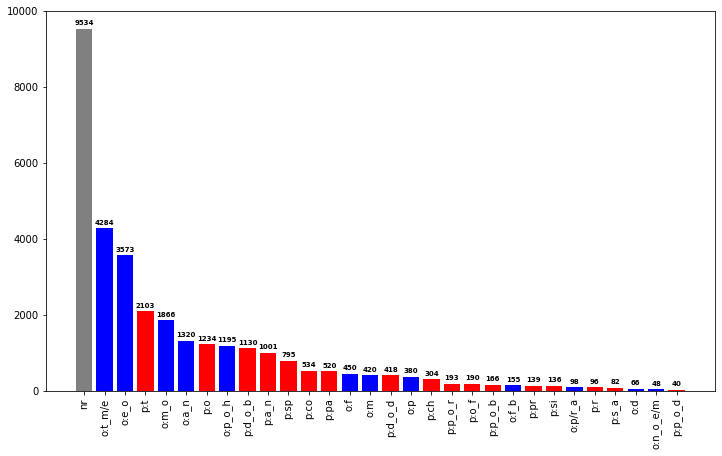

In [30]:
import matplotlib.pyplot as plt

name2nick = {}
for tld in train_labels_dict.items():
    name2nick[tld[0]] = label2nick[tld[1]]

train_labels_num_dict = defaultdict(int)
for train_label in train_data.label:
    train_labels_num_dict[name2nick[train_label]] += 1
    
tlnd4plt_sorted = sorted(train_labels_num_dict.items(), reverse=True, key=lambda x: x[1])
tlnd4plt_sorted_keys = [ts[0] for ts in tlnd4plt_sorted]
tlnd4plt_sorted_values = [ts[1] for ts in tlnd4plt_sorted]

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
clist = []
for tlnd in tlnd4plt_sorted_keys:
    if tlnd.startswith('o'):
        clist.append('blue')
    elif tlnd.startswith('p'):
        clist.append('red')
    else:
        clist.append('gray')
ax.bar(tlnd4plt_sorted_keys, tlnd4plt_sorted_values, color=clist)
plt.xticks(rotation='vertical')

for idx, value in enumerate(tlnd4plt_sorted_values):
    ax.text(idx, value+100, s=value, ha='center', fontweight='bold', fontsize=7)
    
plt.show()

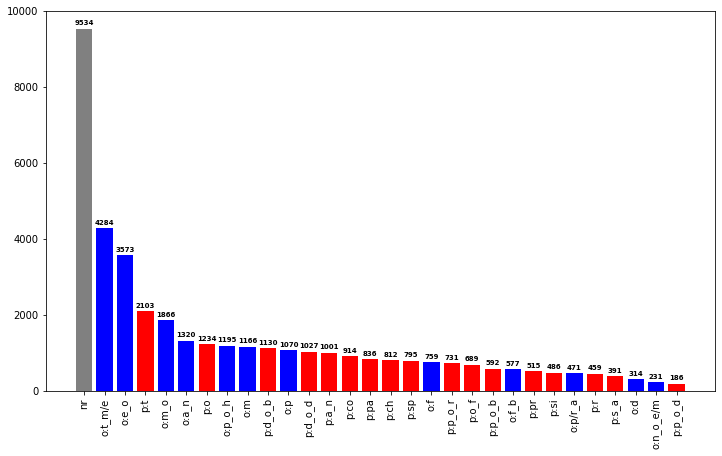

In [190]:
import matplotlib.pyplot as plt

name2nick = {}
for tld in train_labels_dict.items():
    name2nick[tld[0]] = label2nick[tld[1]]

train_labels_num_dict = defaultdict(int)
for train_label in train_data_eda.label:
    train_labels_num_dict[name2nick[train_label]] += 1
    
tlnd4plt_sorted = sorted(train_labels_num_dict.items(), reverse=True, key=lambda x: x[1])
tlnd4plt_sorted_keys = [ts[0] for ts in tlnd4plt_sorted]
tlnd4plt_sorted_values = [ts[1] for ts in tlnd4plt_sorted]

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
clist = []
for tlnd in tlnd4plt_sorted_keys:
    if tlnd.startswith('o'):
        clist.append('blue')
    elif tlnd.startswith('p'):
        clist.append('red')
    else:
        clist.append('gray')
ax.bar(tlnd4plt_sorted_keys, tlnd4plt_sorted_values, color=clist)
plt.xticks(rotation='vertical')

for idx, value in enumerate(tlnd4plt_sorted_values):
    ax.text(idx, value+100, s=value, ha='center', fontweight='bold', fontsize=7)
    
plt.show()

In [191]:
train_data_eda.label.value_counts()

no_relation                            9534
org:top_members/employees              4284
per:employee_of                        3573
per:title                              2103
org:member_of                          1866
org:alternate_names                    1320
per:origin                             1234
org:place_of_headquarters              1195
org:members                            1166
per:date_of_birth                      1130
org:product                            1070
per:date_of_death                      1027
per:alternate_names                    1001
per:colleagues                          914
per:parents                             836
per:children                            812
per:spouse                              795
org:founded                             759
per:place_of_residence                  731
per:other_family                        689
per:place_of_birth                      592
org:founded_by                          577
per:product                     

## LDH - Entity Replacement (ER)

* Label의 개수가 부족한 데이터들에 대해 현재 easy data aug. 기법을 적용한 상태이나, 여전히 imbalance는 심함
* 현재 subject entity는 `PER` 또는 `ORG`의 type으로만 구성되어 있음
    * 이러한 type을 고려하여, type이 같은 데이터 간에 entity를 교체하여 새로운 데이터를 만들 수 있을 것이라는 아이디어
    * Object entity도 type만 파악이 된다면 얼마든지 교체해서 적용 가능함
* 하나 주의해야할 점은, 여전히 문장 구조는 동일하기 때문에 과적합의 위험성이 존재
    * 때문에 이미 augmented 된 데이터들에 대해서 적용하는 것이 좋을 것이라는 생각이 들어, eda를 적용한 데이터와 적용하지 않은 데이터 모두 ER 방식의 augmented 데이터 제작

In [ ]:
# train_data = train_data_aug

In [8]:
sbj_dict = train_data.subject_entity
obj_dict = train_data.object_entity

In [9]:
sbj_dict

0        {'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...
1        {'word': '민주평화당', 'start_idx': 19, 'end_idx': ...
2        {'word': '광주FC', 'start_idx': 21, 'end_idx': 2...
3        {'word': '아성다이소', 'start_idx': 13, 'end_idx': ...
4        {'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...
                               ...                        
32465    {'word': '유기준', 'start_idx': 93, 'end_idx': 95...
32466    {'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...
32467    {'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...
32468    {'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...
32469    {'word': '화순군', 'start_idx': 0, 'end_idx': 2, ...
Name: subject_entity, Length: 32470, dtype: object

In [10]:
obj_dict

0        {'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...
1        {'word': '대안신당', 'start_idx': 14, 'end_idx': 1...
2        {'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...
3        {'word': '박정부', 'start_idx': 22, 'end_idx': 24...
4        {'word': '1967', 'start_idx': 0, 'end_idx': 3,...
                               ...                        
32465    {'word': '부산 서구·동구', 'start_idx': 100, 'end_id...
32466    {'word': '손병희', 'start_idx': 17, 'end_idx': 19...
32467    {'word': '신우철', 'start_idx': 7, 'end_idx': 9, ...
32468    {'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': ...
32469    {'word': '구충곤', 'start_idx': 7, 'end_idx': 9, ...
Name: object_entity, Length: 32470, dtype: object

In [21]:
from collections import defaultdict

sbj_dd, obj_dd = defaultdict(list), defaultdict(list)
for sd, od in zip(sbj_dict, obj_dict):
    sd, od = eval(sd), eval(od)
    for (sd_key, sd_value), (od_key, od_value) in zip(sd.items(), od.items()):
        sbj_dd[sd_key].append(sd_value)
        obj_dd[od_key].append(od_value)
    
sbj_df, obj_df = pd.DataFrame.from_dict(sbj_dd), pd.DataFrame.from_dict(obj_dd)

In [22]:
sbj_df

,word,start_idx,end_idx,type
0,비틀즈,24,26,ORG
1,민주평화당,19,23,ORG
2,광주FC,21,24,ORG
3,아성다이소,13,17,ORG
4,요미우리 자이언츠,22,30,ORG
...,...,...,...,...
32465,유기준,93,95,PER
32466,최시형,7,9,PER
32467,완도군,0,2,ORG
32468,JTBC,6,9,ORG


In [23]:
obj_df

,word,start_idx,end_idx,type
0,조지 해리슨,13,18,PER
1,대안신당,14,17,ORG
2,한국프로축구연맹,34,41,ORG
3,박정부,22,24,PER
4,1967,0,3,DAT
...,...,...,...,...
32465,부산 서구·동구,100,107,LOC
32466,손병희,17,19,PER
32467,신우철,7,9,PER
32468,중앙홀딩스,21,25,ORG


In [24]:
print(sbj_df.type.unique())
print(obj_df.type.unique())

['ORG' 'PER']
['PER' 'ORG' 'DAT' 'LOC' 'POH' 'NOH']


In [26]:
print(sbj_df.type.value_counts())
print()
print(obj_df.type.value_counts())

PER    16786
ORG    15684
Name: type, dtype: int64

PER    9788
ORG    9346
POH    5113
DAT    4249
LOC    3561
NOH     413
Name: type, dtype: int64


In [49]:
tda_label_count = train_data_aug.label.value_counts()
tda_label_count

no_relation                            9534
org:top_members/employees              4284
per:employee_of                        3573
per:title                              2103
org:member_of                          1866
org:alternate_names                    1320
per:origin                             1234
org:place_of_headquarters              1195
org:members                            1166
per:date_of_birth                      1130
org:product                            1070
per:date_of_death                      1027
per:alternate_names                    1001
per:colleagues                          914
per:parents                             836
per:children                            812
per:spouse                              795
org:founded                             759
per:place_of_residence                  731
per:other_family                        689
per:place_of_birth                      592
org:founded_by                          577
per:product                     

In [235]:
from collections import defaultdict

def entity_replacement(data, threshold=1000, entity='subject'):
                    
    def ent2df(data):
        sbj_dict = data.subject_entity
        obj_dict = data.object_entity
        sbj_dd, obj_dd = defaultdict(list), defaultdict(list)
        for sd, od in zip(sbj_dict, obj_dict):
            sd, od = eval(sd), eval(od)
            for (sd_key, sd_value), (od_key, od_value) in zip(sd.items(), od.items()):
                sbj_dd[sd_key].append(sd_value)
                obj_dd[od_key].append(od_value)
                
        sbj_df, obj_df = pd.DataFrame.from_dict(sbj_dd), pd.DataFrame.from_dict(obj_dd)
        
        return sbj_df, obj_df

    def change_entity(row_data, entity='subject'):
        ent_dict = eval(row_data[entity + '_entity'])
        sentence = row_data.sentence
        original_ent = ent_dict['word']
        replaced_ent = original_ent
        while replaced_ent == original_ent:
            sbj_df_same_type = sbj_df[sbj_df.type == ent_dict['type']]
            replaced_ent = random.sample(list(sbj_df_same_type.word), 1)[0]
        
        replaced_sentence = sentence.replace(original_ent, replaced_ent)
        replaced_ent_dict = ent_dict.copy()
        replaced_ent_dict['word']  = replaced_ent
        replaced_ent_dict['start_idx'] = ent_dict['start_idx'] + (len(replaced_ent) - len(original_ent)) * sentence[:ent_dict['start_idx']].count(original_ent)
        replaced_ent_dict['end_idx'] = ent_dict['end_idx'] + (len(replaced_ent) - len(original_ent)) * (sentence[:ent_dict['start_idx']].count(original_ent) + 1)
        
        other_entity = 'object' if entity == 'subject' else 'subject'
        other_ent_dict = eval(row_data[other_entity + '_entity'])
        replaced_other_ent_dict = other_ent_dict.copy()
        if other_ent_dict['start_idx'] > ent_dict['start_idx']:
            replaced_other_ent_dict['start_idx'] = other_ent_dict['start_idx'] + (len(replaced_ent) - len(original_ent)) * sentence[:other_ent_dict['start_idx']].count(original_ent)
            replaced_other_ent_dict['end_idx'] = other_ent_dict['end_idx'] + (len(replaced_ent) - len(original_ent)) * sentence[:other_ent_dict['start_idx']].count(original_ent)
            
        replaced_row_data = {}
        replaced_row_data['id'] = 500000 + row_data.id
        replaced_row_data['sentence'] = replaced_sentence
        replaced_row_data[entity + '_entity'] = str(replaced_ent_dict)
        replaced_row_data[other_entity + '_entity'] = str(replaced_other_ent_dict)
        replaced_row_data['label'] = row_data.label
        replaced_row_data['source'] = row_data.source
        replaced_row_data['original'] = original_ent
        replaced_row_data['replaced'] = replaced_ent
        replaced_row_data = pd.DataFrame.from_dict(replaced_row_data, orient='index').T
        
        return replaced_row_data
    
    sbj_df, obj_df = ent2df(data)
    augmented_data = pd.DataFrame()
    data_label_count = data.label.value_counts()
    for key in dict(data_label_count).keys():
        label_data = data[data.label == key]
        label_data = label_data.sample(frac=1.0).reset_index(drop=True)
        if len(label_data) < threshold:
            for idx, ld in label_data.iterrows():
                replaced_ld = change_entity(ld, entity='subject')
                label_data = pd.concat([label_data, replaced_ld], ignore_index=True)

                if len(label_data) == threshold:
                    break
                    
                # if idx == 9:
                #     break

        augmented_data = pd.concat([augmented_data, label_data], ignore_index=True)
        
        print(f'[{key}] {data_label_count[key]} -> {augmented_data.label.value_counts()[key]}')
    
    print('All data are preprocessed.')
    
    return augmented_data

In [236]:
augmented_train_data = entity_replacement(train_data, threshold=1000, entity='subject')
augmented_train_data

[no_relation] 9534 -> 9534
[org:top_members/employees] 4284 -> 4284
[per:employee_of] 3573 -> 3573
[per:title] 2103 -> 2103
[org:member_of] 1866 -> 1866
[org:alternate_names] 1320 -> 1320
[per:origin] 1234 -> 1234
[org:place_of_headquarters] 1195 -> 1195
[per:date_of_birth] 1130 -> 1130
[per:alternate_names] 1001 -> 1001
[per:spouse] 795 -> 1000
[per:colleagues] 534 -> 1000
[per:parents] 520 -> 1000
[org:founded] 450 -> 900
[org:members] 420 -> 840
[per:date_of_death] 418 -> 836
[org:product] 380 -> 760
[per:children] 304 -> 608
[per:place_of_residence] 193 -> 386
[per:other_family] 190 -> 380
[per:place_of_birth] 166 -> 332
[org:founded_by] 155 -> 310
[per:product] 139 -> 278
[per:siblings] 136 -> 272
[org:political/religious_affiliation] 98 -> 196
[per:religion] 96 -> 192
[per:schools_attended] 82 -> 164
[org:dissolved] 66 -> 132
[org:number_of_employees/members] 48 -> 96
[per:place_of_death] 40 -> 80
All data are preprocessed.


,id,sentence,subject_entity,object_entity,label,source,original,replaced
0,32261,"주승용 국회부의장(여수을, 4선, 국토교통위원회)이 22일 중소벤처기업부‧소상공인시...","{'word': '소상공인시장진흥공단', 'start_idx': 41, 'end_i...","{'word': '중소벤처기업부', 'start_idx': 33, 'end_idx'...",no_relation,wikitree,NaN,NaN
1,16046,"에버퀘스트(기타 다른 MMORPG도 포함한)가 사회학에 끼치는 영향은 ""the HU...","{'word': '에버퀘스트', 'start_idx': 0, 'end_idx': 4...","{'word': 'MMORPG', 'start_idx': 12, 'end_idx':...",no_relation,wikipedia,NaN,NaN
2,9807,1380년 샤를 5세가 사망한 후 샤를 6세(재위 1380년 ~ 1422년) 시대에...,"{'word': '샤를 6세', 'start_idx': 19, 'end_idx': ...","{'word': '샤를 5세', 'start_idx': 6, 'end_idx': 1...",no_relation,wikipedia,NaN,NaN
3,20349,레알 소시에다드와 숙적 아틀레틱 빌바오와의 경기는 바스크 더비로 수식된다.,"{'word': '빌바오', 'start_idx': 18, 'end_idx': 20...","{'word': '바스크', 'start_idx': 28, 'end_idx': 30...",no_relation,wikipedia,NaN,NaN
4,23645,2018년 11월 30일 FA신분이 되어 2019년 2월 15일 오클랜드 애슬레틱스...,"{'word': '오클랜드 애슬레틱스', 'start_idx': 36, 'end_i...","{'word': '2018', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,NaN,NaN
...,...,...,...,...,...,...,...,...
36997,518873,페르난도 무슬레라는 2000년 1월 19일 플로리다주의 카셀베리에서 심장병으로 85...,"{'word': '페르난도 무슬레라', 'start_idx': 0, 'end_idx...","{'word': '플로리다', 'start_idx': 24, 'end_idx': 2...",per:place_of_death,wikipedia,헤디 라마르,페르난도 무슬레라
36998,504421,김창완과 그의 두 형제들로 구성되었던 그룹 산울림의 멤버이자 3형제 중 막내였던 변...,"{'word': '변인선', 'start_idx': 45, 'end_idx': 47...","{'word': '캐나다 벤쿠버', 'start_idx': 59, 'end_idx'...",per:place_of_death,wikipedia,김창익,변인선
36999,511428,빌리 마틴는 1291년 7월 15일 슈파이어에서 죽었다.,"{'word': '빌리 마틴', 'start_idx': 0, 'end_idx': 4...","{'word': '슈파이어', 'start_idx': 20, 'end_idx': 2...",per:place_of_death,wikipedia,루돌프 1세,빌리 마틴
37000,502214,을미사변 때 훈련대 병력을 동원하여 명성황후를 시해하는 데 동참했던 당시 조선훈련대...,"{'word': '박진영', 'start_idx': 205, 'end_idx': 2...","{'word': '일본 히로시마현 구레', 'start_idx': 176, 'end...",per:place_of_death,wikipedia,우범선,박진영


In [247]:
ilocation = 36997
augmented_train_data.sentence.iloc[ilocation][eval(augmented_train_data.subject_entity.iloc[ilocation])['start_idx']:eval(augmented_train_data.subject_entity.iloc[ilocation])['end_idx']+1]

'페르난도 무슬레라'

In [244]:
augmented_train_data.to_csv('~/dataset/train/train_aug_er1000_ksh.csv', index=False)

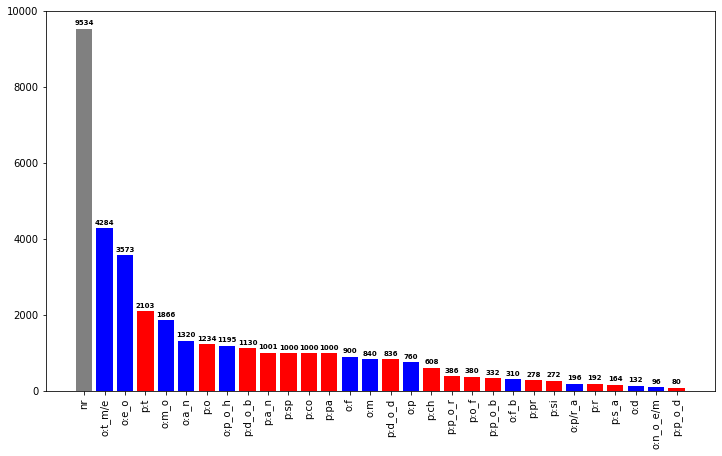

In [245]:
import matplotlib.pyplot as plt

name2nick = {}
for tld in train_labels_dict.items():
    name2nick[tld[0]] = label2nick[tld[1]]

train_labels_num_dict = defaultdict(int)
for train_label in augmented_train_data.label:
    train_labels_num_dict[name2nick[train_label]] += 1
    
tlnd4plt_sorted = sorted(train_labels_num_dict.items(), reverse=True, key=lambda x: x[1])
tlnd4plt_sorted_keys = [ts[0] for ts in tlnd4plt_sorted]
tlnd4plt_sorted_values = [ts[1] for ts in tlnd4plt_sorted]

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
clist = []
for tlnd in tlnd4plt_sorted_keys:
    if tlnd.startswith('o'):
        clist.append('blue')
    elif tlnd.startswith('p'):
        clist.append('red')
    else:
        clist.append('gray')
ax.bar(tlnd4plt_sorted_keys, tlnd4plt_sorted_values, color=clist)
plt.xticks(rotation='vertical')

for idx, value in enumerate(tlnd4plt_sorted_values):
    ax.text(idx, value+100, s=value, ha='center', fontweight='bold', fontsize=7)
    
plt.show()

In [246]:
augmented_train_data_eda = entity_replacement(train_data_eda, threshold=1000, entity='subject')
augmented_train_data_eda

[no_relation] 9534 -> 9534
[org:top_members/employees] 4284 -> 4284
[per:employee_of] 3573 -> 3573
[per:title] 2103 -> 2103
[org:member_of] 1866 -> 1866
[org:alternate_names] 1320 -> 1320
[per:origin] 1234 -> 1234
[org:place_of_headquarters] 1195 -> 1195
[org:members] 1166 -> 1166
[per:date_of_birth] 1130 -> 1130
[org:product] 1070 -> 1070
[per:date_of_death] 1027 -> 1027
[per:alternate_names] 1001 -> 1001
[per:colleagues] 914 -> 1000
[per:parents] 836 -> 1000
[per:children] 812 -> 1000
[per:spouse] 795 -> 1000
[org:founded] 759 -> 1000
[per:place_of_residence] 731 -> 1000
[per:other_family] 689 -> 1000
[per:place_of_birth] 592 -> 1000
[org:founded_by] 577 -> 1000
[per:product] 515 -> 1000
[per:siblings] 486 -> 972
[org:political/religious_affiliation] 471 -> 942
[per:religion] 459 -> 918
[per:schools_attended] 391 -> 782
[org:dissolved] 314 -> 628
[org:number_of_employees/members] 231 -> 462
[per:place_of_death] 186 -> 372
All data are preprocessed.


,id,sentence,subject_entity,object_entity,label,source,original,replaced
0,26765,"분데스리가 이전의 감독 목록과 달리, 1963년 이후의 감독은 바이에른 뮌헨 공식 ...","{'word': '분데스리가', 'start_idx': 0, 'end_idx': 4...","{'word': '1963년', 'start_idx': 21, 'end_idx': ...",no_relation,wikipedia,NaN,NaN
1,11001,요한 바오로 2세의 시복식을 보기 위해 세계 각지에서 100만 명이 넘는 순례객이 ...,"{'word': '요한 바오로 2세', 'start_idx': 0, 'end_idx...","{'word': '바티칸', 'start_idx': 50, 'end_idx': 52...",no_relation,wikipedia,NaN,NaN
2,6292,2017시즌에도 2위를 기록했으나 J3리그를 우승한 블라우블리츠 아키타가 라이센스를...,"{'word': '블라우블리츠 아키타', 'start_idx': 29, 'end_i...","{'word': 'J3리그', 'start_idx': 19, 'end_idx': 2...",no_relation,wikipedia,NaN,NaN
3,29023,"또한, 1996년 애틀란타 올림픽과 2000년 시드니 올림픽에서 심권호 선수가 2회...","{'word': '천규덕', 'start_idx': 125, 'end_idx': 1...","{'word': '역도산', 'start_idx': 112, 'end_idx': 1...",no_relation,wikipedia,NaN,NaN
4,23853,"또한, 이러한 선의 영인 아후라 마즈다와 악의 영인 앙그라 마이뉴는 모두 영원한 존...","{'word': '아후라 마즈다', 'start_idx': 14, 'end_idx'...","{'word': '앙그라 마이뉴', 'start_idx': 29, 'end_idx'...",no_relation,wikipedia,NaN,NaN
...,...,...,...,...,...,...,...,...
45574,611019,워런 G. 하딩 어씨는 본관이 함종(咸從)으로 영조 6년(1730) 6월 29일 경...,"{'word': '워런 G. 하딩', 'start_idx': 0, 'end_idx'...","{'word': '경희궁 어조당(魚藻堂)', 'start_idx': 45, 'end...",per:place_of_death,wikipedia,선의왕후,워런 G. 하딩
45575,930008,"고언랑은 1951년 1월 27일(협정 세계시), 핀란드 시간으로는 1월 28일 스위...","{'word': '고언랑', 'start_idx': 0, 'end_idx': 2, ...","{'word': '스위스 로잔', 'start_idx': 44, 'end_idx':...",per:place_of_death,wikipedia,만네르헤임,고언랑
45576,915990,바트 또한 그가 취임한 그 해에 바티칸 교황 김길식가 취임 33일만에 갑작스레 사망...,"{'word': '김길식', 'start_idx': 25, 'end_idx': 27...","{'word': '바티칸', 'start_idx': 18, 'end_idx': 20...",per:place_of_death,wikipedia,요한 바오로 1세,김길식
45577,821137,루이 16세(대한제국 경기도 시흥 출생 ~ 대한민국 서울에서 별세.)은 대한민국의 ...,"{'word': '루이 16세', 'start_idx': 0, 'end_idx': ...","{'word': '서울', 'start_idx': 29, 'end_idx': 30,...",per:place_of_death,wikipedia,박시창,루이 16세


In [250]:
ilocation = 45574
print(augmented_train_data_eda.sentence.iloc[ilocation][eval(augmented_train_data_eda.subject_entity.iloc[ilocation])['start_idx']:eval(augmented_train_data_eda.subject_entity.iloc[ilocation])['end_idx']+1])
print(augmented_train_data_eda.sentence.iloc[ilocation][eval(augmented_train_data_eda.object_entity.iloc[ilocation])['start_idx']:eval(augmented_train_data_eda.object_entity.iloc[ilocation])['end_idx']+1])

워런 G. 하딩
경희궁 어조당(魚藻堂)


In [251]:
augmented_train_data_eda.to_csv('~/dataset/train/train_aug_4eda_er1000_ksh.csv', index=False)

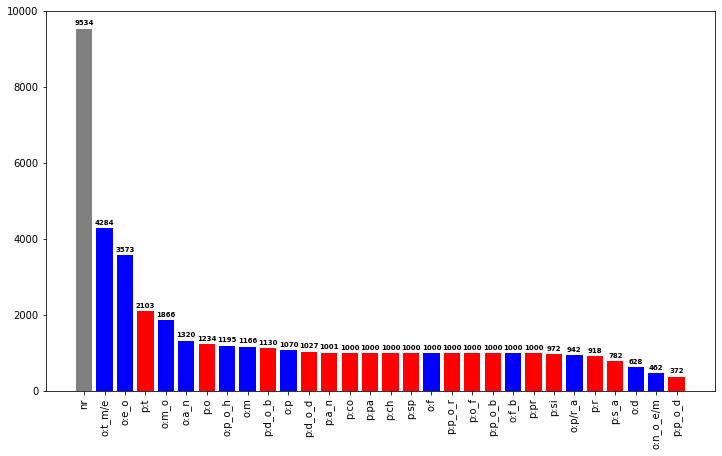

In [252]:
import matplotlib.pyplot as plt

name2nick = {}
for tld in train_labels_dict.items():
    name2nick[tld[0]] = label2nick[tld[1]]

train_labels_num_dict = defaultdict(int)
for train_label in augmented_train_data_eda.label:
    train_labels_num_dict[name2nick[train_label]] += 1
    
tlnd4plt_sorted = sorted(train_labels_num_dict.items(), reverse=True, key=lambda x: x[1])
tlnd4plt_sorted_keys = [ts[0] for ts in tlnd4plt_sorted]
tlnd4plt_sorted_values = [ts[1] for ts in tlnd4plt_sorted]

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
clist = []
for tlnd in tlnd4plt_sorted_keys:
    if tlnd.startswith('o'):
        clist.append('blue')
    elif tlnd.startswith('p'):
        clist.append('red')
    else:
        clist.append('gray')
ax.bar(tlnd4plt_sorted_keys, tlnd4plt_sorted_values, color=clist)
plt.xticks(rotation='vertical')

for idx, value in enumerate(tlnd4plt_sorted_values):
    ax.text(idx, value+100, s=value, ha='center', fontweight='bold', fontsize=7)
    
plt.show()

In [253]:
augmented_train_data_eda2 = entity_replacement(train_data_eda, threshold=2000, entity='subject')
augmented_train_data_eda2

[no_relation] 9534 -> 9534
[org:top_members/employees] 4284 -> 4284
[per:employee_of] 3573 -> 3573
[per:title] 2103 -> 2103
[org:member_of] 1866 -> 2000
[org:alternate_names] 1320 -> 2000
[per:origin] 1234 -> 2000
[org:place_of_headquarters] 1195 -> 2000
[org:members] 1166 -> 2000
[per:date_of_birth] 1130 -> 2000
[org:product] 1070 -> 2000
[per:date_of_death] 1027 -> 2000
[per:alternate_names] 1001 -> 2000
[per:colleagues] 914 -> 1828
[per:parents] 836 -> 1672
[per:children] 812 -> 1624
[per:spouse] 795 -> 1590
[org:founded] 759 -> 1518
[per:place_of_residence] 731 -> 1462
[per:other_family] 689 -> 1378
[per:place_of_birth] 592 -> 1184
[org:founded_by] 577 -> 1154
[per:product] 515 -> 1030
[per:siblings] 486 -> 972
[org:political/religious_affiliation] 471 -> 942
[per:religion] 459 -> 918
[per:schools_attended] 391 -> 782
[org:dissolved] 314 -> 628
[org:number_of_employees/members] 231 -> 462
[per:place_of_death] 186 -> 372
All data are preprocessed.


,id,sentence,subject_entity,object_entity,label,source,original,replaced
0,31192,보스턴 레드삭스를 위하여 한 시즌의 일부 만을 활약하였어도 선수로서 그의 가장 주목...,"{'word': '보스턴 레드삭스', 'start_idx': 0, 'end_idx'...","{'word': '2004', 'start_idx': 83, 'end_idx': 8...",no_relation,wikipedia,NaN,NaN
1,12791,"지브릴 시세가 부상으로 인해 2006년 FIFA 월드컵 명단에서 제외되자, 올랭피크...","{'word': '올랭피크 리옹', 'start_idx': 42, 'end_idx'...","{'word': '2006', 'start_idx': 16, 'end_idx': 1...",no_relation,wikipedia,NaN,NaN
2,30048,"전해 내려오는 이야기에 따르면 8월이 31일이 된 이유는, 아우구스투스가 자신의 이...","{'word': '율리우스 카이사르', 'start_idx': 55, 'end_id...","{'word': '아우구스투스', 'start_idx': 33, 'end_idx':...",no_relation,wikipedia,NaN,NaN
3,27190,"2008년 3월, 이명박 정부가 들어서면서 김삼웅은 ""최근 전 정부에 의해 임명된 ...","{'word': '김삼웅', 'start_idx': 24, 'end_idx': 26...","{'word': '독립기념관 관장', 'start_idx': 180, 'end_id...",no_relation,wikipedia,NaN,NaN
4,31145,포항 스틸러스는 10월 19일 전주월드컵경기장에서 열린 전북 현대 모터스와의 결승전...,"{'word': '전북 현대', 'start_idx': 31, 'end_idx': ...","{'word': '전주월드컵경기장', 'start_idx': 17, 'end_idx...",no_relation,wikipedia,NaN,NaN
...,...,...,...,...,...,...,...,...
57005,630008,"앨버트 공은 1951년 1월 27일(협정 세계시), 핀란드 성상으로는 1월 28일 ...","{'word': '앨버트 공', 'start_idx': 0, 'end_idx': 4...","{'word': '스위스 로잔', 'start_idx': 46, 'end_idx':...",per:place_of_death,wikipedia,만네르헤임,앨버트 공
57006,807229,"요한 바이어는 2004년 8월 13일 프랑스 개월에서 치료 중, 심장마비, 암으로 ...","{'word': '요한 바이어', 'start_idx': 0, 'end_idx': ...","{'word': '프랑스', 'start_idx': 21, 'end_idx': 23...",per:place_of_death,wikipedia,고용희,요한 바이어
57007,530008,"임현주은 1951년 1월 27일(협정 세계시), 핀란드 시간으로는 1월 28일 스위...","{'word': '임현주', 'start_idx': 0, 'end_idx': 2, ...","{'word': '스위스 로잔', 'start_idx': 44, 'end_idx':...",per:place_of_death,wikipedia,만네르헤임,임현주
57008,911428,정태인는 골키퍼 1291년 7월 15일 슈파이어에서 죽었다.,"{'word': '정태인', 'start_idx': 0, 'end_idx': 2, ...","{'word': '슈파이어', 'start_idx': 22, 'end_idx': 2...",per:place_of_death,wikipedia,루돌프 1세,정태인


In [255]:
augmented_train_data_eda2.to_csv('~/dataset/train/train_aug_4eda_er2000_ksh.csv', index=False)

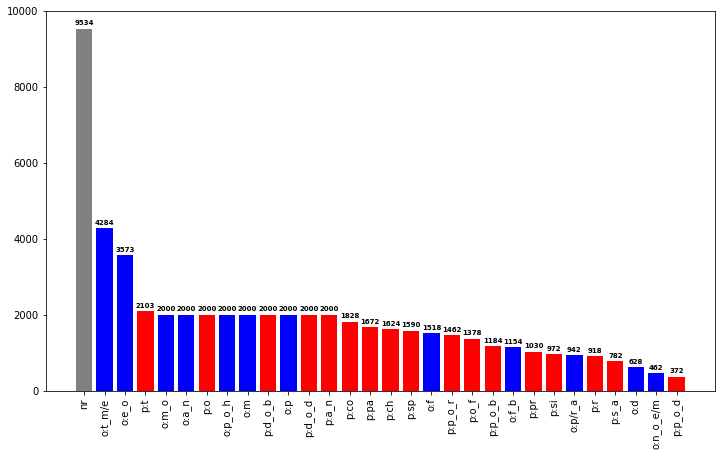

In [254]:
import matplotlib.pyplot as plt

name2nick = {}
for tld in train_labels_dict.items():
    name2nick[tld[0]] = label2nick[tld[1]]

train_labels_num_dict = defaultdict(int)
for train_label in augmented_train_data_eda2.label:
    train_labels_num_dict[name2nick[train_label]] += 1
    
tlnd4plt_sorted = sorted(train_labels_num_dict.items(), reverse=True, key=lambda x: x[1])
tlnd4plt_sorted_keys = [ts[0] for ts in tlnd4plt_sorted]
tlnd4plt_sorted_values = [ts[1] for ts in tlnd4plt_sorted]

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
clist = []
for tlnd in tlnd4plt_sorted_keys:
    if tlnd.startswith('o'):
        clist.append('blue')
    elif tlnd.startswith('p'):
        clist.append('red')
    else:
        clist.append('gray')
ax.bar(tlnd4plt_sorted_keys, tlnd4plt_sorted_values, color=clist)
plt.xticks(rotation='vertical')

for idx, value in enumerate(tlnd4plt_sorted_values):
    ax.text(idx, value+100, s=value, ha='center', fontweight='bold', fontsize=7)
    
plt.show()

In [256]:
augmented_train_data_eda2_nr = augmented_train_data_eda2[augmented_train_data_eda2.label == 'no_relation']
augmented_train_data_eda2_not_nr = augmented_train_data_eda2[augmented_train_data_eda2.label != 'no_relation']

In [ ]:
len(augmented_train_data_eda2_nr)

9534

In [ ]:
augmented_train_data_eda2_nr = augmented_train_data_eda2_nr.sample(frac=0.5).reset_index(drop=True)
len(augmented_train_data_eda2_nr)

4767

In [263]:
augmented_train_data_eda2_nrcut = pd.concat([augmented_train_data_eda2_nr, augmented_train_data_eda2_not_nr], ignore_index=True)
augmented_train_data_eda2_nrcut

,id,sentence,subject_entity,object_entity,label,source,original,replaced
0,22447,"그러나 같은 시기에 주목받았던 신예 프로토스 오영종(당시 화승 OZ), 박지호(당시...","{'word': '오영종', 'start_idx': 25, 'end_idx': 27...","{'word': '프로토스', 'start_idx': 20, 'end_idx': 2...",no_relation,wikipedia,NaN,NaN
1,14,"조토 디 본도네, 마사초, 피에로 델라 프란체스카, 도메니코 기를란다요, 페루지노,...","{'word': '미켈란젤로', 'start_idx': 47, 'end_idx': ...","{'word': '르네상스', 'start_idx': 96, 'end_idx': 9...",no_relation,wikipedia,NaN,NaN
2,28382,분쟁에 참여한 세력들로는 공화파 준군사조직(아일랜드 공화국군 임시파가 가장 유명하다...,"{'word': '얼스터 의용군', 'start_idx': 60, 'end_idx'...","{'word': '아일랜드 공화국군', 'start_idx': 24, 'end_id...",no_relation,wikipedia,NaN,NaN
3,630,"배우 마동석, 박정민, 정해인, 염정아, 최성은, 윤경호 씨가 출연하는 영화 '시동...","{'word': '최성은', 'start_idx': 23, 'end_idx': 25...","{'word': ""시동'"", 'start_idx': 44, 'end_idx': 46...",no_relation,wikitree,NaN,NaN
4,11308,앤 핀치의 이복형이자 오스만 제국 주재 잉글랜드 대사를 역임했던 외교관인 존 핀치(...,"{'word': '앤 핀치', 'start_idx': 59, 'end_idx': 6...","{'word': '잉글랜드', 'start_idx': 22, 'end_idx': 2...",no_relation,wikipedia,NaN,NaN
...,...,...,...,...,...,...,...,...
52238,630008,"앨버트 공은 1951년 1월 27일(협정 세계시), 핀란드 성상으로는 1월 28일 ...","{'word': '앨버트 공', 'start_idx': 0, 'end_idx': 4...","{'word': '스위스 로잔', 'start_idx': 46, 'end_idx':...",per:place_of_death,wikipedia,만네르헤임,앨버트 공
52239,807229,"요한 바이어는 2004년 8월 13일 프랑스 개월에서 치료 중, 심장마비, 암으로 ...","{'word': '요한 바이어', 'start_idx': 0, 'end_idx': ...","{'word': '프랑스', 'start_idx': 21, 'end_idx': 23...",per:place_of_death,wikipedia,고용희,요한 바이어
52240,530008,"임현주은 1951년 1월 27일(협정 세계시), 핀란드 시간으로는 1월 28일 스위...","{'word': '임현주', 'start_idx': 0, 'end_idx': 2, ...","{'word': '스위스 로잔', 'start_idx': 44, 'end_idx':...",per:place_of_death,wikipedia,만네르헤임,임현주
52241,911428,정태인는 골키퍼 1291년 7월 15일 슈파이어에서 죽었다.,"{'word': '정태인', 'start_idx': 0, 'end_idx': 2, ...","{'word': '슈파이어', 'start_idx': 22, 'end_idx': 2...",per:place_of_death,wikipedia,루돌프 1세,정태인


In [266]:
augmented_train_data_eda2_nrcut.to_csv('~/dataset/train/train_aug_4eda_er2000_nrcut_ksh.csv', index=False)

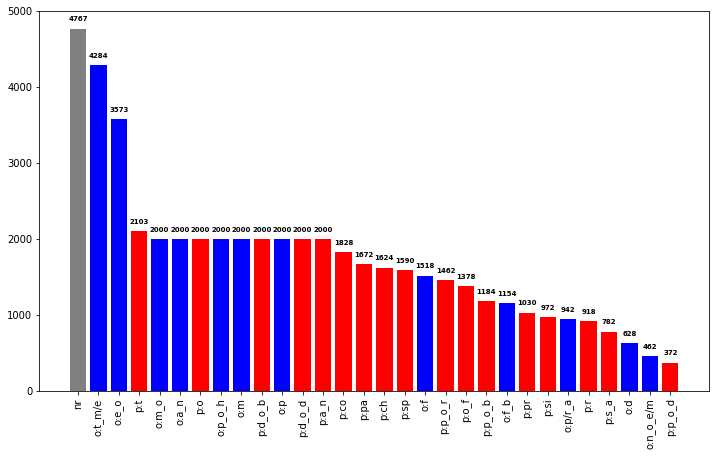

In [265]:
import matplotlib.pyplot as plt

name2nick = {}
for tld in train_labels_dict.items():
    name2nick[tld[0]] = label2nick[tld[1]]

train_labels_num_dict = defaultdict(int)
for train_label in augmented_train_data_eda2_nrcut.label:
    train_labels_num_dict[name2nick[train_label]] += 1
    
tlnd4plt_sorted = sorted(train_labels_num_dict.items(), reverse=True, key=lambda x: x[1])
tlnd4plt_sorted_keys = [ts[0] for ts in tlnd4plt_sorted]
tlnd4plt_sorted_values = [ts[1] for ts in tlnd4plt_sorted]

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
clist = []
for tlnd in tlnd4plt_sorted_keys:
    if tlnd.startswith('o'):
        clist.append('blue')
    elif tlnd.startswith('p'):
        clist.append('red')
    else:
        clist.append('gray')
ax.bar(tlnd4plt_sorted_keys, tlnd4plt_sorted_values, color=clist)
plt.xticks(rotation='vertical')

for idx, value in enumerate(tlnd4plt_sorted_values):
    ax.text(idx, value+100, s=value, ha='center', fontweight='bold', fontsize=7)
    
plt.show()

In [267]:
def train_dev_split(train_data, train_frac=0.9):
    label_list = train_data.label.unique().tolist()
    dev_data = pd.DataFrame(columns=train_data.columns)

    for label in label_list:
        label_data = train_data[train_data.label == label]
        label_data = label_data.sample(frac=0.1, random_state=42)
        train_data = train_data.drop(label_data.index)
        dev_data = pd.concat([dev_data, label_data])
        
    return train_data, dev_data

In [268]:
# train_data
# train_data_eda
# augmented_train_data
# augmented_train_data_eda
# augmented_train_data_eda2
# augmented_train_data_eda2_nrcut

In [269]:
train_data_90, dev_data_10 = train_dev_split(train_data)
train_data_eda_90, dev_data_eda_10 = train_dev_split(train_data_eda)
augmented_train_data_90, augmented_dev_data_10 = train_dev_split(augmented_train_data)
augmented_train_data_eda_90, augmented_dev_data_eda_10 = train_dev_split(augmented_train_data_eda)
augmented_train_data_eda2_90, augmented_dev_data_eda2_10 = train_dev_split(augmented_train_data_eda2)
augmented_train_data_eda2_nrcut_90, augmented_dev_data_eda2_nrcut_10 = train_dev_split(augmented_train_data_eda2_nrcut)

In [270]:
train_data_90.to_csv('~/dataset/train/train_90_ksh.csv', index=True)
dev_data_10.to_csv('~/dataset/dev/dev_10_ksh.csv', index=True)
train_data_eda_90.to_csv('~/dataset/train/train_aug_4eda_90_ksh.csv', index=True)
dev_data_eda_10.to_csv('~/dataset/dev/dev_aug_4eda_10_ksh.csv', index=True)
augmented_train_data_90.to_csv('~/dataset/train/train_aug_er1000_90_ksh.csv', index=True)
augmented_dev_data_10.to_csv('~/dataset/dev/dev_aug_er1000_10_ksh.csv', index=True)
augmented_train_data_eda_90.to_csv('~/dataset/train/train_aug_4eda_er1000_90_ksh.csv', index=True)
augmented_dev_data_eda_10.to_csv('~/dataset/dev/dev_aug_4eda_er1000_10_ksh.csv', index=True)
augmented_train_data_eda2_90.to_csv('~/dataset/train/train_aug_4eda_er2000_90_ksh.csv', index=True)
augmented_dev_data_eda2_10.to_csv('~/dataset/dev/dev_aug_4eda_er2000_10_ksh.csv', index=True)
augmented_train_data_eda2_nrcut_90.to_csv('~/dataset/train/train_aug_4eda_er2000_nrcut_90_ksh.csv', index=True)
augmented_dev_data_eda2_nrcut_10.to_csv('~/dataset/dev/dev_aug_4eda_er2000_nrcut_10_ksh.csv', index=True)

## Train-Dev Split 방식 수정

* 현재 방식은 augmentation을 가하고, 이후에 9:1 split을 진행하는 방식
    * 과적합이 발생할 것으로 예상됨
* 9:1 split 이후에 augmentation을 가하고, dev에는 augmentation 없이 검증하는 방식으로 한 번 수행
    * Train: `train_aug_90_4eda_er2000_nrcut_ksh.csv`
    * Dev: `dev_10_ksh.csv`

In [1]:
from data_preprocessing import synonym_replacement as sr
from data_preprocessing import random_deletion as rd
from data_preprocessing import random_swap as rs
from data_preprocessing import random_insertion as ri
import pandas as pd

train_data = pd.read_csv('~/dataset/train/train_90_ksh.csv')

label_list = [
        "no_relation",
        "org:top_members/employees",
        "org:members",
        "org:product",
        "per:title",
        "org:alternate_names",
        "per:employee_of",
        "org:place_of_headquarters",
        "per:product",
        "org:number_of_employees/members",
        "per:children",
        "per:place_of_residence",
        "per:alternate_names",
        "per:other_family",
        "per:colleagues",
        "per:origin",
        "per:siblings",
        "per:spouse",
        "org:founded",
        "org:political/religious_affiliation",
        "org:member_of",
        "per:parents",
        "org:dissolved",
        "per:schools_attended",
        "per:date_of_death",
        "per:date_of_birth",
        "per:place_of_birth",
        "per:place_of_death",
        "org:founded_by",
        "per:religion",
    ]

from collections import defaultdict

label_emergency = defaultdict(list)
for label in label_list:
    num_label = train_data.label.value_counts()[label]
    if num_label > 0 and num_label < 100:
        label_emergency['fucked'].append(label)
    elif num_label >= 100 and num_label < 200:
        label_emergency['danger'].append(label)
    elif num_label >= 200 and num_label < 450:
        label_emergency['warning'].append(label)
    elif num_label >= 450 and num_label < 700:
        label_emergency['soso'].append(label)
    else:
        label_emergency['good'].append(label)
        
        
augmented_data = pd.DataFrame()
for level, labels in label_emergency.items():
    for label in labels:
        level_data = train_data[train_data.label == label]
        augmented_data = augmented_data.append(level_data, ignore_index=True)
        if level == 'good':
            pass
        elif level == 'soso':
            augmented_data = augmented_data.append(sr(level_data, n=2)[len(level_data):], ignore_index=True)
        elif level == 'warning':
            augmented_data = augmented_data.append(sr(level_data, n=2)[len(level_data):], ignore_index=True)
            augmented_data = augmented_data.append(rs(level_data, n_pairs=1)[len(level_data):], ignore_index=True)
        elif level == 'danger':
            augmented_data = augmented_data.append(sr(level_data, n=2)[len(level_data):], ignore_index=True)
            augmented_data = augmented_data.append(rs(level_data, n_pairs=1)[len(level_data):], ignore_index=True)
            augmented_data = augmented_data.append(ri(level_data, n=1)[len(level_data):], ignore_index=True)
        elif level == 'fucked':
            augmented_data = augmented_data.append(sr(level_data, n=2)[len(level_data):], ignore_index=True)
            augmented_data = augmented_data.append(rs(level_data, n_pairs=1)[len(level_data):], ignore_index=True)
            augmented_data = augmented_data.append(ri(level_data, n=1)[len(level_data):], ignore_index=True)
            augmented_data = augmented_data.append(rd(level_data, n=1)[len(level_data):], ignore_index=True)
        print(f'[{label}]: {len(level_data)} -> {augmented_data.label.value_counts()[label]}')
        
train_aug_data = augmented_data

[no_relation]: 8581 -> 8581
[org:top_members/employees]: 3856 -> 3856
[per:title]: 1893 -> 1893
[org:alternate_names]: 1188 -> 1188
[per:employee_of]: 3216 -> 3216
[org:place_of_headquarters]: 1075 -> 1075
[per:alternate_names]: 901 -> 901
[per:origin]: 1111 -> 1111
[per:spouse]: 715 -> 715
[org:member_of]: 1679 -> 1679
[per:date_of_birth]: 1017 -> 1017
[org:members]: 378 -> 1050
[org:product]: 342 -> 959
[per:children]: 274 -> 733
[org:founded]: 405 -> 1086
[per:date_of_death]: 376 -> 923
[per:product]: 125 -> 464
[per:place_of_residence]: 174 -> 658
[per:other_family]: 171 -> 623
[per:siblings]: 122 -> 435
[per:place_of_birth]: 149 -> 534
[org:founded_by]: 139 -> 516
[org:number_of_employees/members]: 43 -> 207
[org:political/religious_affiliation]: 88 -> 424
[org:dissolved]: 59 -> 280
[per:schools_attended]: 74 -> 356
[per:place_of_death]: 36 -> 167
[per:religion]: 86 -> 410
[per:colleagues]: 481 -> 824
[per:parents]: 468 -> 752


In [2]:
train_aug_data.to_csv('~/dataset/train/train_90_aug_4eda_ksh.csv', index=False)

In [3]:
from data_preprocessing import entity_replacement

train_data = entity_replacement(train_data, threshold=1000, entity='subject')
train_data.to_csv('~/dataset/train/train_90_aug_er1000_ksh.csv', index=False)

train_aug_data_copy = train_aug_data.copy()
train_aug_data = entity_replacement(train_aug_data_copy, threshold=1000, entity='subject')
train_aug_data.to_csv('~/dataset/train/train_90_aug_4eda_er1000_ksh.csv', index=False)
train_aug_data = entity_replacement(train_aug_data_copy, threshold=2000, entity='subject')
train_aug_data.to_csv('~/dataset/train/train_90_aug_4eda_er2000_ksh.csv', index=False)

[no_relation] 8581 -> 8581
[org:top_members/employees] 3856 -> 3856
[per:employee_of] 3216 -> 3216
[per:title] 1893 -> 1893
[org:member_of] 1679 -> 1679
[org:alternate_names] 1188 -> 1188
[per:origin] 1111 -> 1111
[org:place_of_headquarters] 1075 -> 1075
[per:date_of_birth] 1017 -> 1017
[per:alternate_names] 901 -> 1000
[per:spouse] 715 -> 1000
[per:colleagues] 481 -> 962
[per:parents] 468 -> 936
[org:founded] 405 -> 810
[org:members] 378 -> 756
[per:date_of_death] 376 -> 752
[org:product] 342 -> 684
[per:children] 274 -> 548
[per:place_of_residence] 174 -> 348
[per:other_family] 171 -> 342
[per:place_of_birth] 149 -> 298
[org:founded_by] 139 -> 278
[per:product] 125 -> 250
[per:siblings] 122 -> 244
[org:political/religious_affiliation] 88 -> 176
[per:religion] 86 -> 172
[per:schools_attended] 74 -> 148
[org:dissolved] 59 -> 118
[org:number_of_employees/members] 43 -> 86
[per:place_of_death] 36 -> 72
All data are preprocessed.
[no_relation] 8581 -> 8581
[org:top_members/employees] 3856

In [4]:
train_aug_data_nr = train_aug_data[train_aug_data.label == 'no_relation']
train_aug_data_nr = train_aug_data_nr.sample(frac=0.5).reset_index(drop=True)
train_aug_data_not_nr = train_aug_data[train_aug_data.label != 'no_relation']
train_aug_data_nrcut = pd.concat([train_aug_data_nr, train_aug_data_not_nr], ignore_index=True)

train_aug_data_nrcut.to_csv('~/dataset/train/train_90_aug_4eda_er2000_nrcut_ksh.csv', index=False)